In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Input, Dense

In [6]:
dataset = pd.read_csv("Comment_Toxicity.csv")

In [7]:
dataset.shape

(159571, 8)

In [8]:
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
dataset.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [12]:
X = dataset["comment_text"]
Y = dataset.iloc[:, 2:]

In [13]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
Y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
X_train.shape

(111699,)

In [17]:
X_test.shape

(47872,)

In [18]:
y_train.shape

(111699, 6)

In [19]:
y_test.shape

(47872, 6)

In [20]:
tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [21]:
X_test[:5]

[[78,
  1369,
  17389,
  4341,
  2,
  156,
  62,
  3229,
  330,
  21,
  5,
  4120,
  16432,
  5133,
  13090,
  2064,
  2679,
  4,
  1437,
  12635,
  50,
  64382,
  11279,
  1726,
  2829,
  15,
  252,
  9348,
  8710],
 [98, 1591, 2, 355, 163, 38],
 [94, 38],
 [159,
  3,
  5299,
  85037,
  7,
  19,
  319,
  20,
  71,
  489,
  1,
  85037,
  166,
  1,
  28,
  23,
  36,
  85037,
  85,
  101,
  19,
  55,
  135,
  31,
  498,
  3,
  6176,
  1,
  153,
  555,
  136,
  556,
  43,
  14,
  55,
  1,
  6176,
  999,
  24,
  2,
  315,
  1,
  23,
  14,
  1,
  166,
  2,
  1,
  153,
  53,
  43,
  239,
  2,
  33,
  21,
  1,
  1577,
  1833,
  491,
  432,
  2582,
  532,
  2198,
  466,
  181],
 [20, 3316, 203, 8532, 2061]]

In [22]:
X_train[:5]

[[455,
  93,
  652,
  3655,
  3684,
  186,
  96,
  2196,
  2,
  1,
  137,
  65,
  11,
  24,
  1905,
  9,
  41,
  24,
  30,
  1210,
  2,
  300,
  471,
  4,
  2,
  462,
  272],
 [13,
  707,
  23,
  8,
  48,
  876,
  1258,
  87,
  301,
  422,
  465,
  8,
  290,
  77322,
  77323,
  8,
  566,
  1905,
  9115,
  107,
  18,
  566,
  1905,
  823,
  1981,
  8,
  77324,
  1905,
  1,
  23,
  1676,
  1364,
  1815,
  2,
  150,
  2010,
  2956,
  2030,
  107,
  31,
  5,
  683,
  19620,
  62,
  17,
  423,
  3,
  66,
  1738,
  63,
  77325,
  43,
  1073,
  47,
  421,
  40,
  52,
  8,
  278,
  13,
  8,
  5,
  98,
  314,
  3,
  40,
  28,
  56,
  14,
  16,
  4,
  13,
  23,
  56,
  16,
  202,
  15,
  1,
  435,
  27,
  17,
  5,
  504,
  2,
  2197,
  5758],
 [309, 11, 103, 128, 311, 103, 11, 121, 434, 14498],
 [53147,
  8568,
  8820,
  134,
  53147,
  2,
  927,
  2,
  10622,
  4,
  52,
  556,
  24,
  14,
  32,
  23690],
 [6484,
  24,
  5,
  376,
  1211,
  655,
  3,
  308,
  1,
  297,
  9,
  4372,
  24,
  1924,

In [23]:
unique_words = tokenizer.word_index
len(unique_words)

169093

In [24]:
len_train = max([len(seq) for seq in X_train])
len_test = max([len(seq) for seq in X_test])
max_len = max(len_train,len_test)
print(max_len)

1401


In [25]:
X_train_padded = pad_sequences(X_train, maxlen=max_len, padding='pre')
X_test_padded = pad_sequences(X_test, maxlen=max_len, padding='pre')

In [26]:
X_train_padded

array([[    0,     0,     0, ...,     2,   462,   272],
       [    0,     0,     0, ...,     2,  2197,  5758],
       [    0,     0,     0, ...,   121,   434, 14498],
       ...,
       [    0,     0,     0, ...,     5,  4229, 69967],
       [    0,     0,     0, ...,    20,   164,   333],
       [    0,     0,     0, ...,     2,  6957,   684]], dtype=int32)

In [27]:
print(X_train_padded.shape)
print(X_test_padded.shape)

(111699, 1401)
(47872, 1401)


In [33]:
i = Input(shape=(max_len,))
x = Embedding(input_dim=200000, output_dim=30)(i)
x = LSTM(64)(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(6, activation='sigmoid')(x)
model = Model(inputs=i, outputs=x)
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1401)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 1401, 30)          6000000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                24320     
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 6)                 774 

In [49]:
traning = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5)

Epoch 1/5
3491/3491 [==============================] - 206s 59ms/step - loss: 0.0392 - accuracy: 0.9942 - val_loss: 0.0516 - val_accuracy: 0.9941
Epoch 2/5
3491/3491 [==============================] - 203s 58ms/step - loss: 0.0345 - accuracy: 0.9940 - val_loss: 0.0504 - val_accuracy: 0.9941
Epoch 3/5
3491/3491 [==============================] - 202s 58ms/step - loss: 0.0298 - accuracy: 0.9932 - val_loss: 0.0510 - val_accuracy: 0.9940
Epoch 4/5
3491/3491 [==============================] - 199s 57ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0592 - val_accuracy: 0.9940
Epoch 5/5
3491/3491 [==============================] - 198s 57ms/step - loss: 0.0218 - accuracy: 0.9737 - val_loss: 0.0651 - val_accuracy: 0.9917


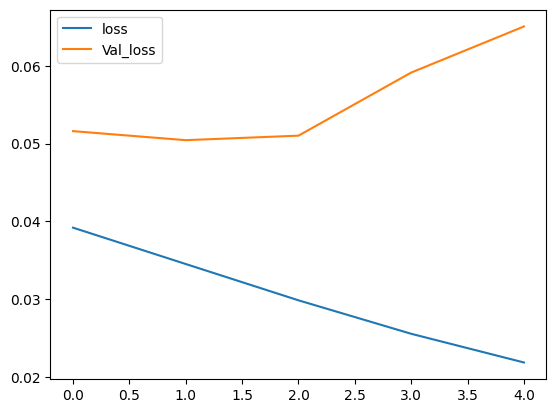

In [50]:
plt.plot(traning.history["loss"],label="loss")
plt.plot(traning.history["val_loss"],label="Val_loss")
plt.legend()

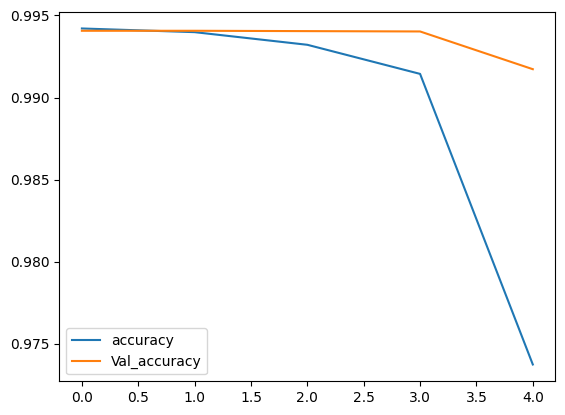

In [51]:
plt.plot(traning.history["accuracy"],label="accuracy")
plt.plot(traning.history["val_accuracy"],label="Val_accuracy")
plt.legend()

In [59]:
def predict(comment):
      sequence = tokenizer.texts_to_sequences([comment])
      padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='pre')
      prediction = model.predict(padded_sequence)
      print(prediction)

In [60]:
predict("I love you")

1/1 [==============================] - 0s 60ms/step
[[3.5278494e-03 5.5813305e-11 4.3199325e-05 6.9086100e-06 8.3584229e-05
  2.7597314e-04]]


In [61]:
predict("I will kill you")

1/1 [==============================] - 0s 37ms/step
[[0.96544325 0.09333888 0.02538463 0.40964833 0.18941574 0.4692226 ]]


In [62]:
predict("I hate you")

1/1 [==============================] - 0s 32ms/step
[[9.0180421e-01 5.7028024e-05 2.5669583e-03 2.6374827e-03 8.1370108e-02
  1.0132559e-02]]


In [63]:
predict("The running shoes I just bought are awesome")


1/1 [==============================] - 0s 31ms/step
[[1.1660975e-05 3.2618740e-20 2.9655769e-09 9.4107655e-10 1.4603848e-08
  1.2990637e-06]]


In [64]:
predict("are you stupid")

1/1 [==============================] - 0s 34ms/step
[[9.9663490e-01 3.9902804e-03 9.0798932e-01 7.9581823e-04 9.7539222e-01
  2.9720658e-02]]


In [65]:
predict("You're a worthless piece of garbage, and nobody likes you.")

1/1 [==============================] - 0s 50ms/step
[[0.98742735 0.00475174 0.6877253  0.00281978 0.9493033  0.07240133]]
